<a href="https://colab.research.google.com/github/Swapnil-417/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether the patient has a 10-year risk of future coronary heart disease (CHD) </u></b>

# **Problem Description**

### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patient’s information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **Data Description**

**Demographic:**
* **Sex**: male or female("M" or "F")
* **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
* **CigsPerDay**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
* **BPMeds**: whether or not the patient was on blood pressure medication (Nominal)
* **PrevalentStroke**: whether or not the patient had previously had a stroke (Nominal)
* **PrevalentHyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)

**Medical(current)**
* **TotChol**: total cholesterol level (Continuous)
* **SysBP**: systolic blood pressure (Continuous)
* **DiaBP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **HeartRate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)

**Predict variable (desired target)**
* **TenYearCHD**: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

In [470]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import auc, roc_curve, confusion_matrix, plot_confusion_matrix

In [471]:
import warnings
warnings.filterwarnings('ignore')

In [472]:
# importing data
dir_path= "/content/drive/MyDrive/Capstone Projects/Cardiovascular Risk Prediction - Swapnil Patil/data/"
data= pd.read_csv(dir_path + "data_cardiovascular_risk.csv")

# **Data Exploration**

In [473]:
# first look
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [474]:
data .tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [475]:
# checking dimensions
data.shape

(3390, 17)

In [476]:
# checking columns
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [477]:
# basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

# **Data Preprocessing**


In [478]:
# checking for duplicate values
data.duplicated().sum()

0

In [479]:
# checking the columns with missing values
columns_with_missing_values = data.columns[data.isnull().any()]
data[columns_with_missing_values].isnull().sum()

education      87
cigsPerDay     22
BPMeds         44
totChol        38
BMI            14
heartRate       1
glucose       304
dtype: int64

In [480]:
data[data['glucose'].isnull()].head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0
10,10,61,1.0,F,NO,0.0,0.0,0,1,0,NaN,185.0,121.0,35.22,80.0,NaN,0
36,36,46,3.0,F,NO,0.0,0.0,0,0,0,193.0,106.5,70.5,26.18,75.0,NaN,0
38,38,41,2.0,F,YES,9.0,1.0,1,1,0,180.0,114.0,70.0,22.41,92.0,NaN,0
55,55,51,2.0,F,NO,0.0,0.0,0,1,0,351.0,134.0,97.5,21.66,100.0,NaN,0


glucose has a relation with diabetes and we will see it

In [481]:
data[data['diabetes']== 0].head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [482]:
data[data['diabetes']== 1].head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
77,77,63,1.0,F,NO,0.0,0.0,0,1,1,150.0,152.0,88.0,36.54,72.0,170.0,0
107,107,45,4.0,M,NO,0.0,0.0,0,0,1,189.0,132.0,78.0,28.40,75.0,177.0,0
130,130,63,1.0,M,NO,0.0,0.0,0,0,1,229.0,109.0,75.0,38.42,110.0,120.0,0
134,134,64,1.0,F,NO,0.0,0.0,0,1,1,262.0,147.0,90.0,26.51,85.0,173.0,0
173,173,58,1.0,F,NO,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1


We can see non-diabetic person has glucose less than 100 whereas diabetic person has glucose above 100. Since, diabetes column do not have any null value so we will use it in filling missing values of glucose column

In [483]:
# mean glucose of non-diabetic person
mean_glu0 = int(data[data['diabetes']== 0]['glucose'].mean())
mean_glu0

79

In [484]:
# # mean glucose of diabetic person
mean_glu1 = int(data[data['diabetes']== 1]['glucose'].mean())
mean_glu1

171

In [485]:
# filling null values of glucose column
cond = data['diabetes'] == 1
data['glucose'] = data['glucose'].fillna(cond.map({True:mean_glu1, False: mean_glu0}))

The other features have very few missing entries and could be dropped without losing a lot of data.

In [486]:
# droping missing values
data = data.dropna()

In [487]:
data.isnull().any()

id                 False
age                False
education          False
sex                False
is_smoking         False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

There are no any missing values present in the dataset. Also, id and education columns are not so usefull for us so droping both.

In [488]:
data = data.drop(['id','education'], axis=1)

In [489]:
data.dtypes

age                  int64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [490]:
# change dtypes
data = data.astype({'BPMeds':int, 'cigsPerDay':int})

In [491]:
new_df = data.rename(columns={'sex':'gender'})

In [492]:
new_df.head()

,age,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,M,NO,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,F,NO,0,0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [493]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3189.0,49.423957,8.556235,32.00,42.00,49.00,56.00,70.0
cigsPerDay,3189.0,9.098150,11.864621,0.00,0.00,0.00,20.00,70.0
BPMeds,3189.0,0.029476,0.169164,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3189.0,0.005958,0.076970,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3189.0,0.313264,0.463894,0.00,0.00,0.00,1.00,1.0
diabetes,3189.0,0.025400,0.157361,0.00,0.00,0.00,0.00,1.0
totChol,3189.0,236.968642,44.537998,113.00,206.00,234.00,264.00,600.0
sysBP,3189.0,132.436344,22.176848,83.50,117.00,128.00,143.50,295.0
diaBP,3189.0,82.841173,11.993650,48.00,74.50,82.00,89.50,142.5
BMI,3189.0,25.774569,4.132848,15.96,22.94,25.37,27.99,56.8


From statistical overview of the dataset, we infer that some data features are binary, whereas other features are continuous. Further, the minimum and maximum values for some features, notably for 'totChol' and 'sysBP'. This suggests the presence of outliers in the data.

### **Checking Outliers**

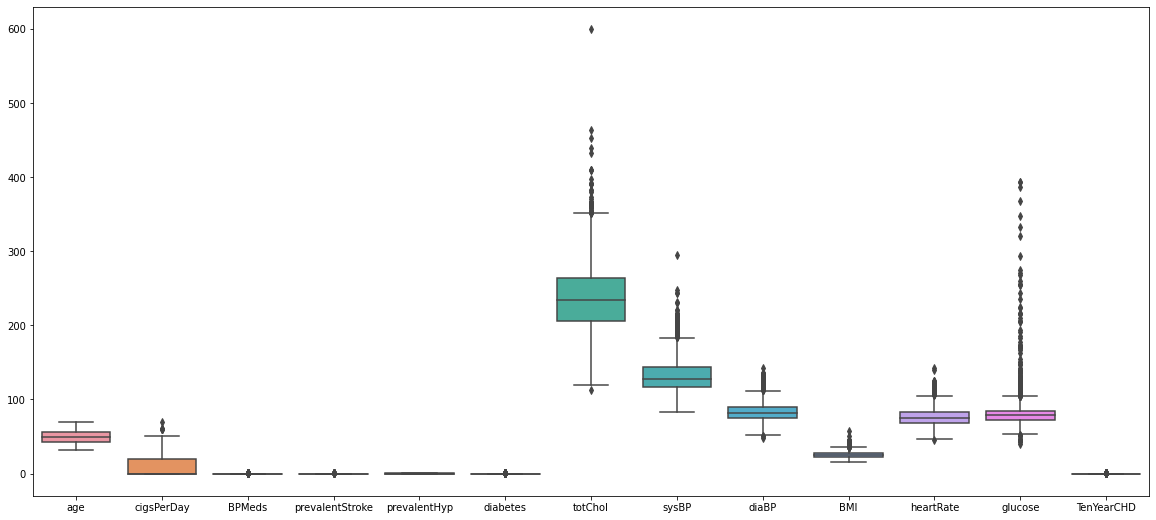

In [494]:
plt.figure(figsize=(20,9))
sns.boxplot(data= new_df)
plt.show()

We can see there are outliers in some features but it can be normal for these features to have high values and they will be usefull. We will drop extreme outliers from some of the columns.

In [495]:
# droping outliers from totChol column above 500
new_df= new_df.drop(new_df[new_df['totChol']>500].index)

In [496]:
# droping outliers from sysBP column above 250
new_df=new_df.drop(new_df[new_df['sysBP']==250].index)

# **Exploratory Data Analysis**

In [497]:
cont_var= ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
cat_var= ['gender','is_smoking']
bin_var= ['BPMeds','prevalentStroke','prevalentHyp','diabetes']
target= 'TenYearCHD'

### **Independent Variables**

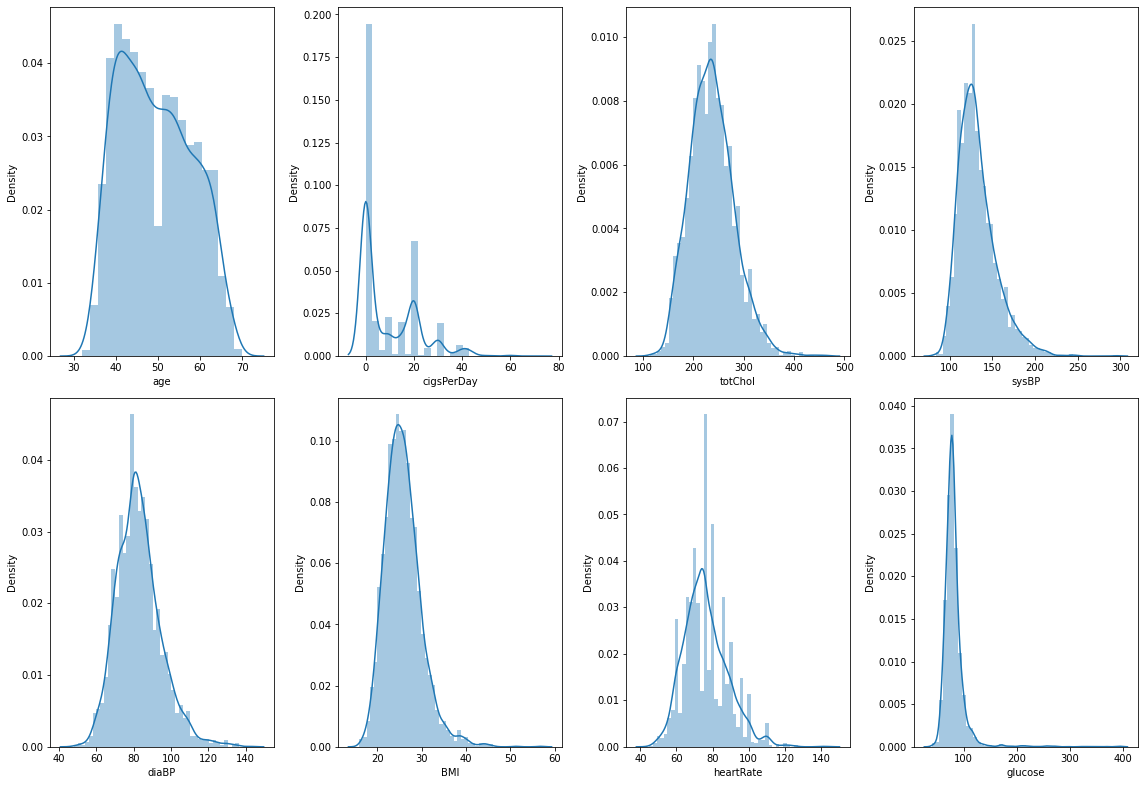

In [498]:
# check distribution
def check_dist(df):
    l = df.columns.values
    number_of_columns=(len(l))/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)+1):
        plt.subplot(number_of_rows+1,number_of_columns,i)
        sns.distplot(df[l[i-1]],kde=True) 
        plt.tight_layout()
        
check_dist(new_df[cont_var])

## **Bivariate Analysis**

### **Categorical Variables**

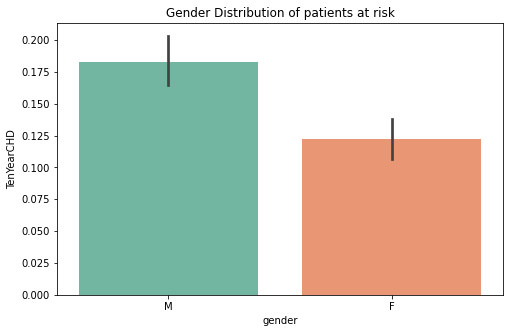

In [499]:
# which gender has most risk of CHD
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.barplot(x='gender',y='TenYearCHD', data=new_df, palette='Set2')
ax.set_title("Gender Distribution of patients at risk")
plt.show()

According to this dataset, males have shown a slightly higher risk of coronary heart disease.

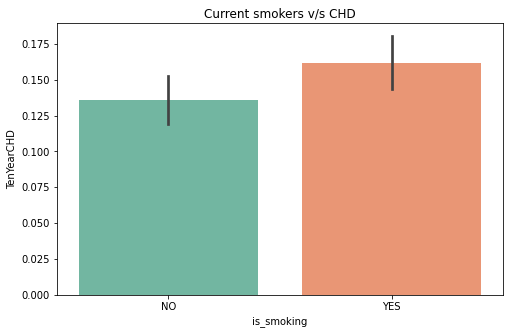

In [500]:
# Does smokers have risk of CHD
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='is_smoking',y='TenYearCHD', data=new_df, palette='Set2')
ax.set_title("Current smokers v/s CHD")
plt.show()

Current smokers have high risk of contracting coronary heart disease than non smokers.

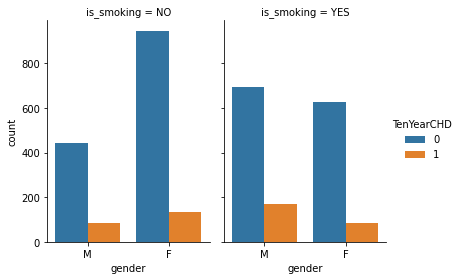

In [501]:
# Distribution of smokers according to gender over TenYearCHD

sns.catplot(x="gender", hue="TenYearCHD", col="is_smoking",
                data=new_df, kind="count", height=4, aspect=.7)
plt.show()

There are more male smokers than females. Thus, male have higher risk of contracting coronary heart diease.

**Continuous Variables**

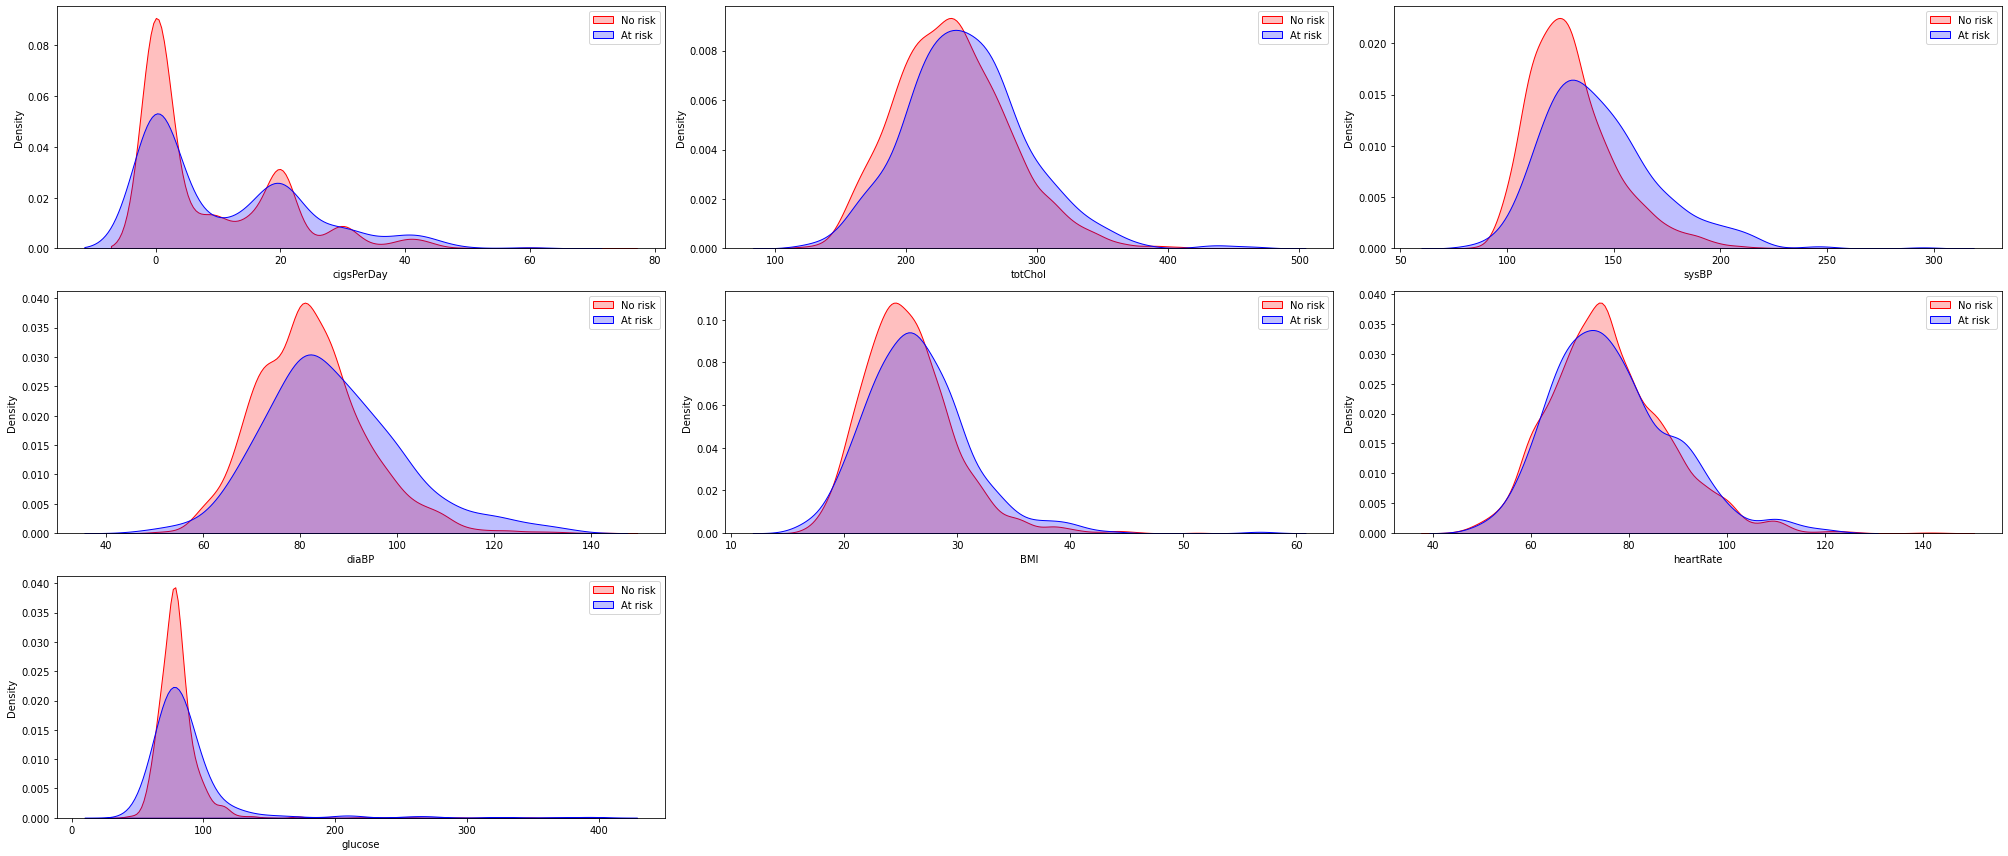

In [502]:
# Which continuous variables are risk factors
l = cont_var
number_of_columns=(len(l)-1)/2
number_of_rows = 2

plt.figure(figsize=(8*number_of_columns,6*number_of_rows))
for i in range(1,len(l)):
    plt.subplot(number_of_rows+1,number_of_columns,i)
    fig = sns.kdeplot(new_df[l[i]][new_df['TenYearCHD'] == 0], shade=True, color="r", label='No risk')
    fig = sns.kdeplot(new_df[l[i]][new_df['TenYearCHD'] == 1], shade=True, color="b",label='At risk')
    plt.legend()
    plt.tight_layout()

There is no direct correlation of coronary heart disease with the cholestrol, BMI, heartrate and glucose.

Patients having higher systolic pressure tends to have high risk of Coronary heart disease.

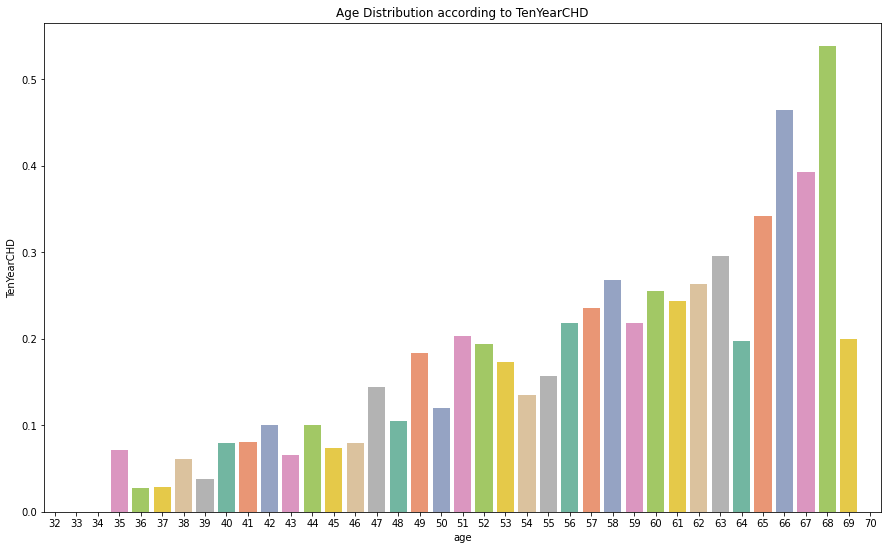

In [503]:
# which age has most risk
temp1_df= new_df.groupby("age", as_index=False).TenYearCHD.mean()

fig, ax = plt.subplots(figsize=(15,9))
ax = sns.barplot(x='age', y='TenYearCHD', data=temp1_df, palette='Set2')
ax.set_title("Age Distribution according to TenYearCHD")
plt.show()

The average of diseased patients increases with increasing age. The peoples of age above 55 have high risk of contracting disease and the risk increases with age.

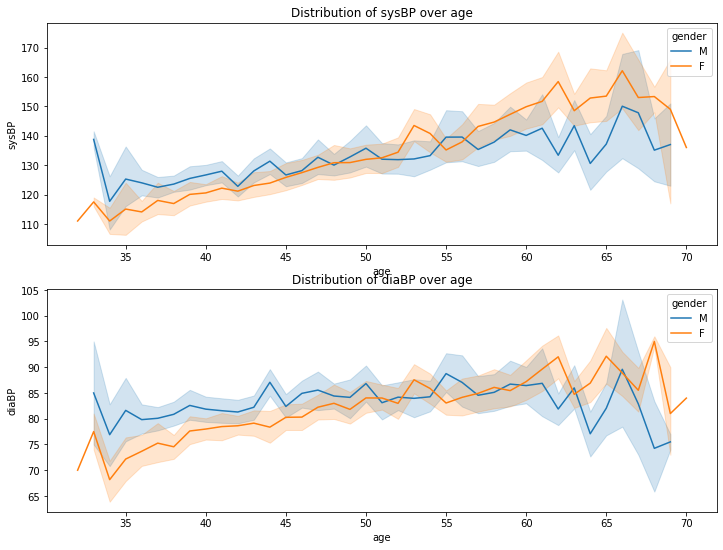

In [504]:
# Distribution of sysBP and diaBP over age in relation to gender
plt.subplots(figsize=(12, 9))

plt.subplot(2,1,1)
sns.lineplot(data=new_df, x="age", y='sysBP', hue="gender")
plt.title("Distribution of sysBP over age")

plt.subplot(2,1,2)
sns.lineplot(data=new_df, x="age", y='diaBP', hue="gender")
plt.title("Distribution of diaBP over age")

plt.show()

Womens of above 50 age have higher systolic BP as compared to men thus increasing risk of disease.

**Binary Variables**

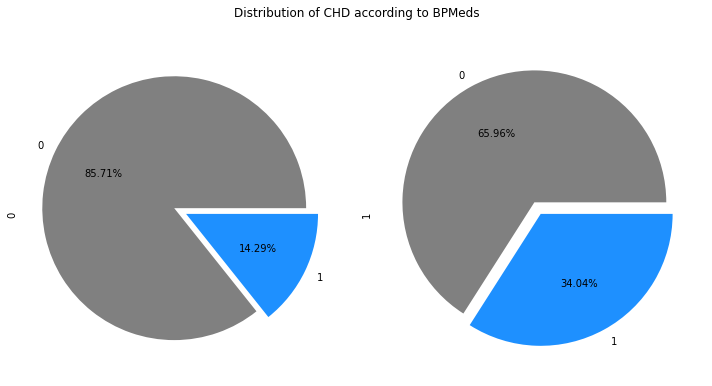

In [505]:
# Risk of CHD to a patient on BP medication
bp_df= new_df.groupby(['BPMeds', 'TenYearCHD']).size().reset_index().pivot(
                            columns='BPMeds', index='TenYearCHD', values=0)

colors = ['grey', 'dodgerblue']
bp_df.plot(kind='pie', subplots=True, figsize=(10,6), colors=colors,
           autopct='%.2f%%', explode=[0.1,0], legend=False)

plt.suptitle("Distribution of CHD according to BPMeds")
plt.tight_layout()
plt.show()

The risk of getting Coronary Heart Disease for a patient on BP medication is 34% whereas, a patient having no BP medication has only 14% of risk.

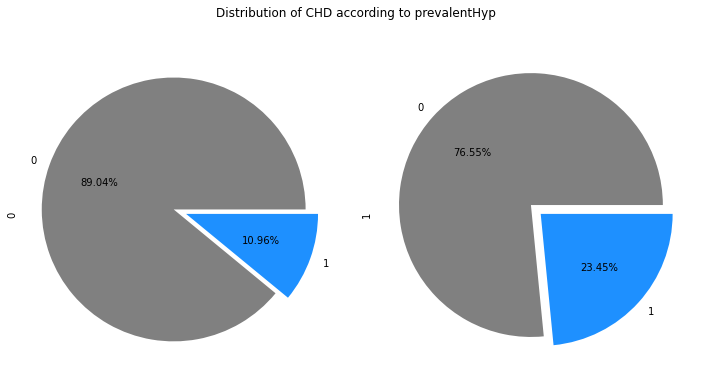

In [506]:
# Risk of CHD to a patient having hypertension
prevstroke_df= new_df.groupby(['prevalentHyp', 'TenYearCHD']).size().reset_index().pivot(
                                    columns='prevalentHyp', index='TenYearCHD', values=0)

prevstroke_df.plot(kind='pie', subplots=True, figsize=(10,6), colors=colors,
                  autopct='%.2f%%', explode=[0.1,0], legend=False)

plt.suptitle("Distribution of CHD according to prevalentHyp")
plt.tight_layout()
plt.show()

If a patient is hypertensive then the risk of contracting Coronary Heart Disease is 37% whereas, a patient with no hypertension has only 10% of risk.

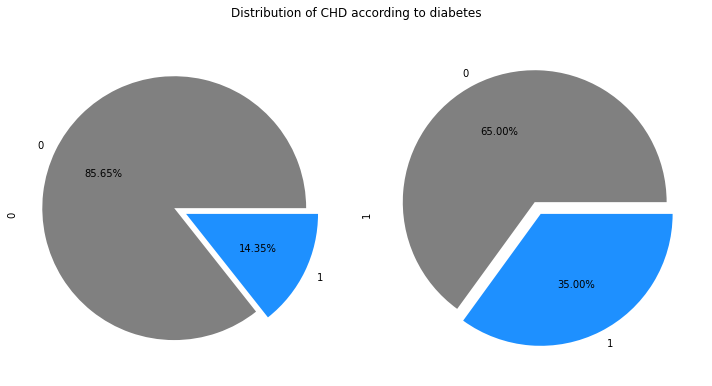

In [507]:
# Risk of CHD to a diabetic patient 
diabetes_df= new_df.groupby(['diabetes', 'TenYearCHD']).size().reset_index().pivot(
                                    columns='diabetes', index='TenYearCHD', values=0)

diabetes_df.plot(kind='pie', subplots=True, figsize=(10,6), colors=colors,
                autopct='%.2f%%', explode=[0.1,0], legend=False)

plt.suptitle("Distribution of CHD according to diabetes")
plt.tight_layout()
plt.show()

The risk of getting Coronary Heart Disease to a diabetic patient is 35% whereas, non-diabetic patient has only 14% of risk.

## **Analyzing Dependent Variable**

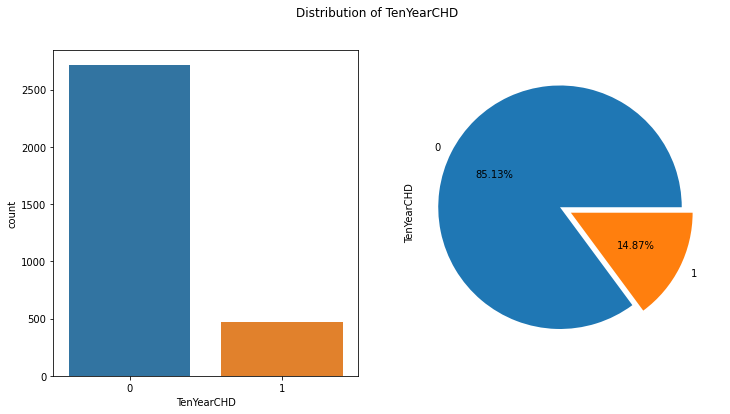

In [508]:
# Distribution of target variable
plt.subplots(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=new_df[target])

plt.subplot(1, 2, 2)
new_df[target].value_counts().plot.pie(autopct='%1.2f%%', explode=[0.1,0])

plt.suptitle("Distribution of TenYearCHD")
plt.show()

The distribution is highly imbalanced. We can see, the count of patients at risk is very less as compared to no risk patients. This would lead to class imbalance problem while fitting our models.

# **Feature Engineering**

In [509]:
new_df.head()

,age,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,M,NO,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,F,NO,0,0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [510]:
# Converting categorical data to numeric data
new_df['gender'] = new_df['gender'].apply(lambda x: 1 if x=='M' else 0)
new_df['is_smoking'] = new_df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [511]:
new_df.head()

,age,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,1,0,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,0,0,0,0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


## **Feature Selection**

Feature selection is a way of selecting the subset of the most relevant features from the original features set by removing the redundant, irrelevant, or noisy features.

**SelectKBest method to select top 11 most important features**

In [512]:
# spliting features and target variable]
X = new_df.drop("TenYearCHD", axis=1)
y = new_df["TenYearCHD"]

In [513]:
from sklearn.feature_selection import SelectKBest, chi2

In [514]:
selector = SelectKBest(chi2, k=11)
best_fit = selector.fit(X,y)
best_features = list(X.columns[selector.get_support(indices=True)])
print(best_features)

['age', 'gender', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']


In [515]:
scores_df = pd.DataFrame(columns=['feature','score'])
scores_df['feature'] = X.columns
scores_df['score'] = best_fit.scores_
print(scores_df.nlargest(11,'score'))

         feature       score
9          sysBP  521.933916
13       glucose  334.137969
0            age  249.893139
3     cigsPerDay  212.365723
8        totChol  209.509164
10         diaBP  102.768688
6   prevalentHyp   58.025067
4         BPMeds   27.303304
7       diabetes   25.615405
1         gender   12.467195
11           BMI   10.080137


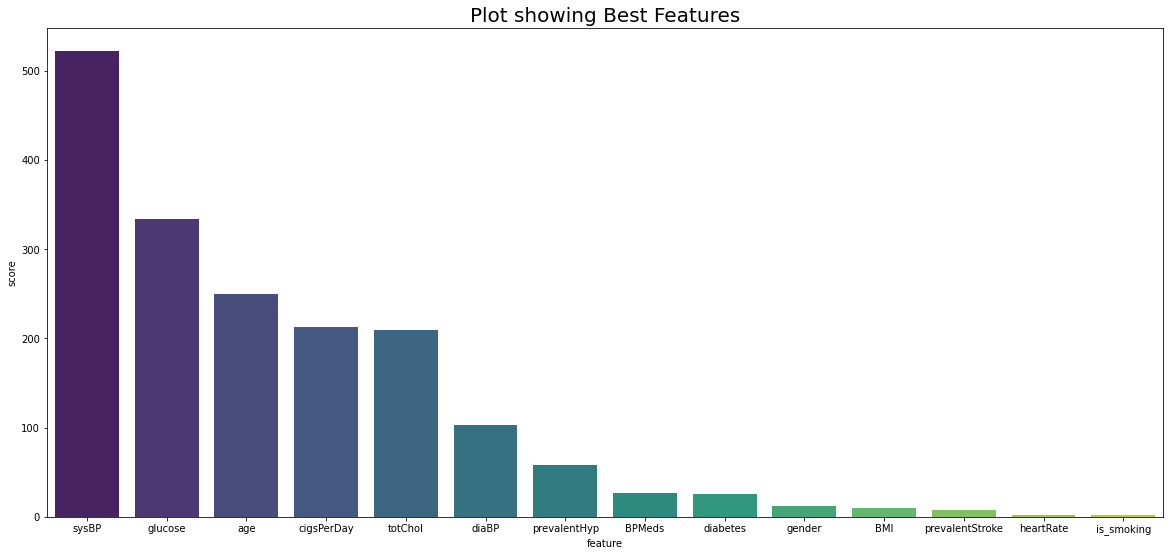

In [516]:
# # visualizing feature selection
scores_df=scores_df.sort_values(by="score", ascending=False)
plt.figure(figsize=(20,9), facecolor='w')
sns.barplot(x='feature',y='score',data=scores_df,palette='viridis')
plt.title("Plot showing Best Features", size=20)
plt.show()

In [517]:
print(best_features)

['age', 'gender', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']


**Selecting best 11 features**

In [518]:
new_df=new_df[['age', 'gender', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'totChol', 'sysBP','diabetes', 'diaBP', 'BMI', 'glucose', "TenYearCHD"]]
new_df.head()

,age,gender,cigsPerDay,BPMeds,prevalentHyp,totChol,sysBP,diabetes,diaBP,BMI,glucose,TenYearCHD
1,36,1,0,0,1,212.0,168.0,0,98.0,29.77,75.0,0
2,46,0,10,0,0,250.0,116.0,0,71.0,20.35,94.0,0
3,50,1,20,0,1,233.0,158.0,0,88.0,28.26,94.0,1
4,64,0,30,0,0,241.0,136.5,0,85.0,26.42,77.0,0
5,61,0,0,0,1,272.0,182.0,0,121.0,32.80,65.0,1


### **Balancing the target variable**

**Let's see how unbalanced the dataset is:**

Class 0: 2714
Class 1: 474
Proportion: 5.73 : 1


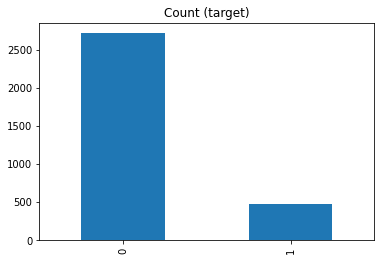

In [519]:
# Class count
count_class_0, count_class_1 = new_df['TenYearCHD'].value_counts()

print('Class 0:', count_class_0)
print('Class 1:', count_class_1)
print('Proportion:', round(count_class_0 / count_class_1, 2), ': 1')

new_df['TenYearCHD'].value_counts().plot(kind='bar', title='Count (target)');

Applying sampling method to deal with the imbalance problem.

In [520]:
# Divide by class
df_class_0 = new_df[new_df['TenYearCHD'] == 0]
df_class_1 = new_df[new_df['TenYearCHD'] == 1]

**Random over-sampling**

In [521]:
# random over sampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
new_df = pd.concat([df_class_0, df_class_1_over], axis=0)

Random over-sampling:
0    2714
1    2714
Name: TenYearCHD, dtype: int64


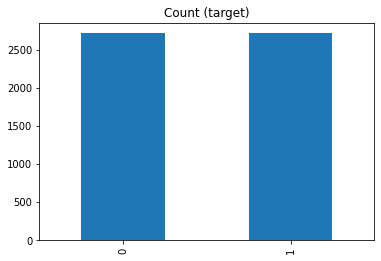

In [522]:
print('Random over-sampling:')
print(new_df['TenYearCHD'].value_counts())

new_df['TenYearCHD'].value_counts().plot(kind='bar', title='Count (target)');

In [523]:
new_df.reset_index(drop= True, inplace= True)

In [524]:
new_df.shape

(5428, 12)

## **Train Test Split and Scaling**

In [525]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [526]:
X = new_df.drop("TenYearCHD", axis=1)
y = new_df['TenYearCHD']

In [527]:
# Spliting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [528]:
# Scaling
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Predictive Modeling**

**Defining funtions**

In [529]:
# creating function to calculate evaluation metrics
results = {}

def evaluation_metrics(y_act, y_pred, model=None):
  '''
      Takes actual target values and estimated target values as input
      and returns evaluation metrics as output
  '''

  print("Evaluation Metrics on test data:")

  # accuracy score
  acc = accuracy_score(y_act, y_pred)
  print(f"accuracy score: {acc}")

  # precision score
  prec = precision_score(y_act, y_pred)
  print(f"Precision: {prec}")

  # recall
  recall = recall_score(y_act, y_pred)
  print(f"Recall: {recall}")

  # f1 score
  f1 = f1_score(y_act, y_pred)
  print(f"f1 score: {f1}")

  # appending result into dictionary
  results[model]= [acc,prec,recall,f1]

In [530]:
# function to plot roc curve
def plot_roc_curve(y_act, pred_proba):

  ''' 
  This function computes and plots the receiver operating characteristic curve, or ROC curve.
  '''

  fpr, tpr, threshold = roc_curve(y_act, pred_proba)
  roc_auc = auc(fpr, tpr)

  # Printing AUC
  print(f"roc-auc score: {roc_auc}")

  # Plotting the ROC
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

## **K-NEAREST NEIGHBORS (K-NN)**

In [531]:
#create parameter grid
param_grid = {'n_neighbors': np.arange(16, 31)}

In [532]:
#create new a knn model
knn_clf = KNeighborsClassifier()

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_clf, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [533]:
#checking top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 17}

We can see that 17 is the optimal value for ‘n_neighbors’.

In [534]:
# optimal model
knn_optimal_model = knn_gscv.best_estimator_

In [535]:
# predicted classes
train_pred_knn = knn_optimal_model.predict(X_train)
test_pred_knn = knn_optimal_model.predict(X_test)

In [536]:
# Predicted Probability
test_proba_knn = knn_optimal_model.predict_proba(X_test)[:,1]

In [537]:
# train set accuracy score
accuracy_score(y_train,train_pred_knn)

0.7329894374846475

### **Model Evaluation**

In [538]:
# Evaluation metrics
evaluation_metrics(y_test, test_pred_knn, "K-NEAREST NEIGHBORS")

Evaluation Metrics on test data:
accuracy score: 0.6904937361827561
Precision: 0.6796116504854369
Recall: 0.7216494845360825
f1 score: 0.7


**Confusion Matrix**

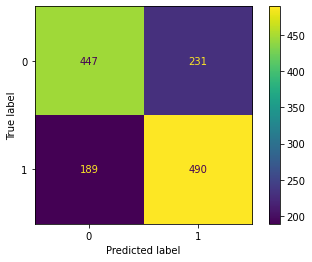

In [539]:
# visualize the confusion matrix
plot_confusion_matrix(knn_optimal_model, X_test, y_test)
plt.show()

**AUC-ROC Curve**

roc-auc score: 0.7484631659433229


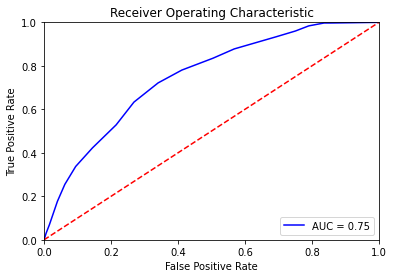

In [540]:
plot_roc_curve(y_test, test_proba_knn)

## **Spport Vectors Classifier (SVC)**

In [541]:
# create SVC model
svc_optimal_model = SVC(probability=True)

# fitting model
svc_optimal_model.fit(X_train, y_train)

SVC(probability=True)

In [542]:
# predicted classes
train_pred_svc = svc_optimal_model.predict(X_train)
test_pred_svc = svc_optimal_model.predict(X_test)

In [543]:
# Predicted Probability
test_proba_svc = svc_optimal_model.predict_proba(X_test)[:,1]

In [544]:
# train set accuracy score
accuracy_score(y_train,train_pred_svc)

0.6863178580201424

### **Model Evaluation**

In [545]:
# Evaluation metrics
evaluation_metrics(y_test, test_pred_svc, "SVC")

Evaluation Metrics on test data:
accuracy score: 0.6573323507737656
Precision: 0.663109756097561
Recall: 0.6406480117820325
f1 score: 0.651685393258427


**Confusion Matrix**

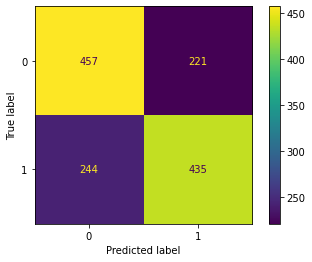

In [546]:
# visualize the confusion matrix
plot_confusion_matrix(svc_optimal_model, X_test, y_test)
plt.show()

**AUC-ROC Curve**

roc-auc score: 0.7224303917351997


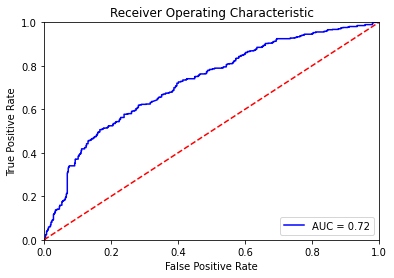

In [547]:
plot_roc_curve(y_test, test_proba_svc)

## **Decision Tree Classifier**

In [548]:
# hyperparameter grid
param_dict_dt = {'max_depth': [10, 15, 20, 25],
                 'min_samples_leaf': [30, 40, 50],
                 'criterion': ["gini", "entropy"]
                 }

In [558]:
# creating model instance
dt_clf= DecisionTreeClassifier(random_state= 42)

# fitting model
dt_grid = GridSearchCV(dt_clf, param_dict_dt, scoring = 'accuracy', verbose =3, cv =5)
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=30;, score=0.692 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=30;, score=0.732 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=30;, score=0.711 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=30;, score=0.716 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=30;, score=0.706 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=40;, score=0.691 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=40;, score=0.708 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=40;, score=0.683 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=40;, score=0.720 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=40;, score=0.7

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'min_samples_leaf': [30, 40, 50]},
             scoring='accuracy', verbose=3)

In [559]:
# best_parameters
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 30}

In [560]:
# optimal model
dt_optimal= dt_grid.best_estimator_

In [561]:
# predicted classes
train_pred_dt = dt_optimal.predict(X_train)
test_pred_dt = dt_optimal.predict(X_test)

In [562]:
# Predicted Probability
test_proba_dt = dt_optimal.predict_proba(X_test)[:,1]

In [563]:
# train set accuracy score
accuracy_score(y_train,train_pred_dt)

0.7708179808400885

### **Model Evaluation**

In [564]:
# Evaluation metrics on test set
evaluation_metrics(y_test, test_pred_dt, "DecisionTree Classifier")

Evaluation Metrics on test data:
accuracy score: 0.7022844509948416
Precision: 0.6870748299319728
Recall: 0.7437407952871871
f1 score: 0.7142857142857142


**Confusion Matrix**

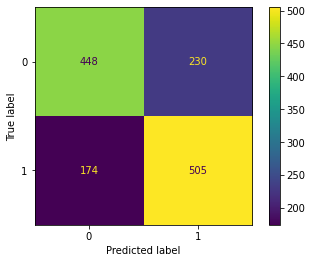

In [556]:
# visualize the confusion matrix
plot_confusion_matrix(dt_optimal, X_test, y_test)
plt.show()

**AUC-ROC Curve**

roc-auc score: 0.7852722422789024


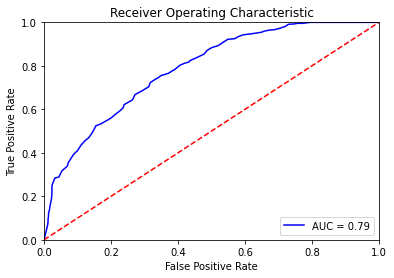

In [557]:
plot_roc_curve(y_test, test_proba_dt)